# HOW TO obtain data from ESO catalogues

The ESO catalogue facility provides access to the collection of data that were produced by PIs of ESO programmes and then integrated into the ESO science archive through the Phase 3 process. The full list of available cataolgues could be found here: https://www.eso.org/qi/

To access the data you can use the _programmatic access_ (http://archive.eso.org/programmatic/#TAP) via the `tap_cat` TAP Service. `download_catalogues` is a simple python wrapper around this.

In [1]:
from ESOAsg.ancillary import astro
from ESOAsg.core import download_catalogues
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

## Choose the catalogue you want to query

To begin, you need to know which catalogue you are interested to query. If in doubt, you can either check the query interface webpage (https://www.eso.org/qi/) or you can obtain a list of all catalogues using:
```python
download_catalogues.all_catalogues()
```

In [3]:
all_catalogues = download_catalogues.all_catalogues()

Now `all_catalogues` contains all catalogues (and all the versions) currently present at ESO:

In [4]:
for catalogue in all_catalogues: print(catalogue.rjust(50), sep='/n')

                                          AMBRE_V1
                                       ATLASGAL_V1
          COSMOS2015_Laigle_v1_1b_latestV7_fits_V1
                             EREBOS_RV_cat_fits_V1
                                EREBOS_cat_fits_V1
            GES_iDR4_PIII2016_Catalogue_v3_fits_V2
                                    GOODS_FORS2_V1
                                    GOODS_ISAAC_V1
                               GOODS_VIMOS_SPEC_V1
                                  HUGS_GOODSS_K_V1
                                     HUGS_UDS_K_V1
                                     HUGS_UDS_Y_V1
                       KiDS_DR3_0_ugri_src_fits_V2
                     KiDS_DR3_1_ugri_shear_fits_V1
                 KiDS_DR4_0_ugriZYJHKs_cat_fits_V3
                    KiDS_DR4_1_ugriZYJHKs_cat_fits
                               MW_BULGE_PSFPHOT_V1
                         NGTS_LC_CATALOGUE_fits_V1
                     NGTS_SOURCE_CATALOGUE_fits_V1
                              P

## Get a catalogue
Once you decided which is your favourite catalogue, you can get it using:
```python
download_catalogues.query_catalogue(catalogue_name)
```
In this example, for instance, we are interested in obtaining the first 2,000 entries of the `VIKING` (based on observations made with ESO Telescopes at the La Silla or Paranal Observatories under programme ID: 179.A-2004(M); see here https://www.eso.org/qi/catalog/show/320 for more details):

In [8]:
VIKING = download_catalogues.query_catalogue('viking_er4_zyjj_1j_2hks_catMetaData_fits_V3', maxrec=2000)

[INFO]    :: The query is:
[INFO]    :: SELECT 
                    * 
               FROM 
                    viking_er4_zyjj_1j_2hks_catMetaData_fits_V3
            


The result is thus stored in an `astropy.table`:

In [6]:
VIKING.show_in_notebook(display_length=5)

## Explore the data

Now the `VIKING` catalogue is ready to be explored. As an example, we are showing here color-color diagram for stars (in blue) and extended sources (red):

<IPython.core.display.Javascript object>


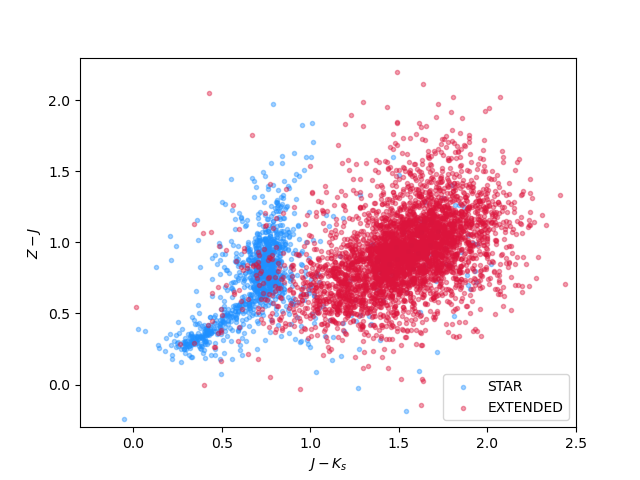

In [15]:
CLASS_STAR = VIKING['MERGEDCLASS'].data
JK = VIKING['JAPERMAG3'].data-VIKING['KSAPERMAG3'].data
ZJ = VIKING['ZAPERMAG3'].data-VIKING['JAPERMAG3'].data

plt.figure()
plt.xlim(-.3,2.5)
plt.ylim(-.3,2.3)
plt.scatter(JK[CLASS_STAR==-1],ZJ[CLASS_STAR==-1], label=r'STAR', c='dodgerblue', alpha=0.4, marker='.')
plt.scatter(JK[CLASS_STAR==1],ZJ[CLASS_STAR==1], label=r'EXTENDED', c='crimson', alpha=0.4, marker='.')
plt.xlabel(r'$J - K_s$')
plt.ylabel(r'$Z - J$')
plt.legend()
plt.show()
plt.savefig('viking.jpg', format='jpg', quality=99, bbox_inches='tight')